In [4]:
# --------------------------------------------------------
# 1. DATA LOADING & CLEANING  (FIXED VERSION)
# --------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("retail_sales_dataset.csv")

print("First five rows:")
print(df.head())

print("\nColumn names:", df.columns.tolist())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Fix for deprecated fillna
df = df.ffill()

# Auto-detect date column
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print("\nDetected date columns:", date_cols)

if len(date_cols) == 0:
    raise ValueError("No date column found! Please check df.columns to see the available columns.")
else:
    date_col = date_cols[0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.rename(columns={date_col: 'date'})


First five rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Column names: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Col

In [5]:
# --------------------------------------------------------
# 2. DESCRIPTIVE STATISTICS
# --------------------------------------------------------

print("\nBasic Statistics:")
print(df.describe())

# Mode (most frequent value)
print("\nMode:")
print(df.mode().iloc[0])



Basic Statistics:
       Transaction ID                           date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000  

Detected sales columns: ['Price per Unit', 'Total Amount']


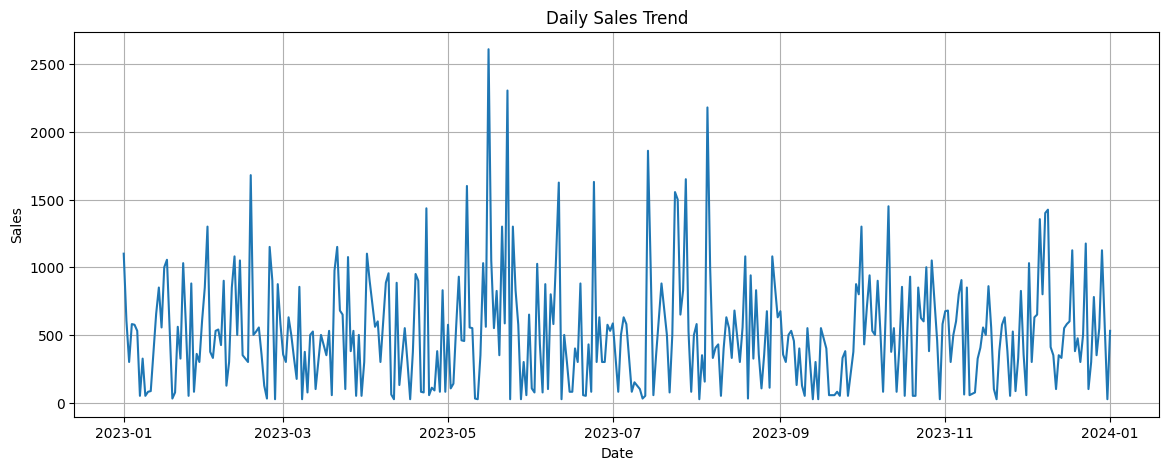

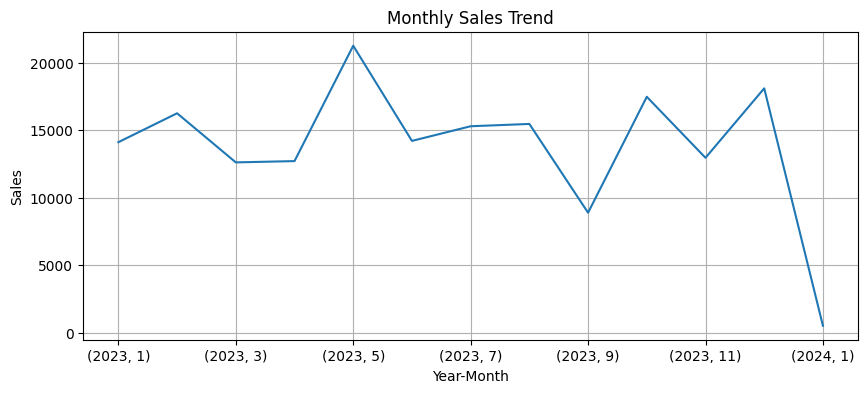

In [7]:
# --------------------------------------------------------
# FIXED TIME SERIES ANALYSIS
# --------------------------------------------------------

# Detect sales column
sales_cols = [col for col in df.columns if any(x in col.lower() for x in ['sale', 'amount', 'revenue', 'total', 'price'])]
print("Detected sales columns:", sales_cols)

if len(sales_cols) == 0:
    raise ValueError("No sales-like column found!")
else:
    df = df.rename(columns={sales_cols[0]: 'sales'})

# Extract year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Group by date
daily_sales = df.groupby('date')['sales'].sum()

plt.figure(figsize=(14,5))
plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Monthly Trends
monthly_sales = df.groupby(['year','month'])['sales'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


Detected product column: ['Product Category']
Detected customer column: ['Transaction ID', 'Customer ID']


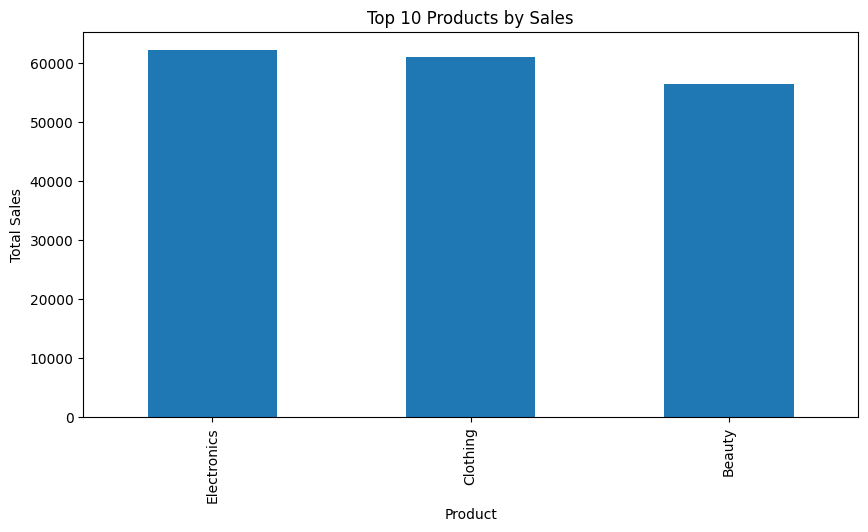

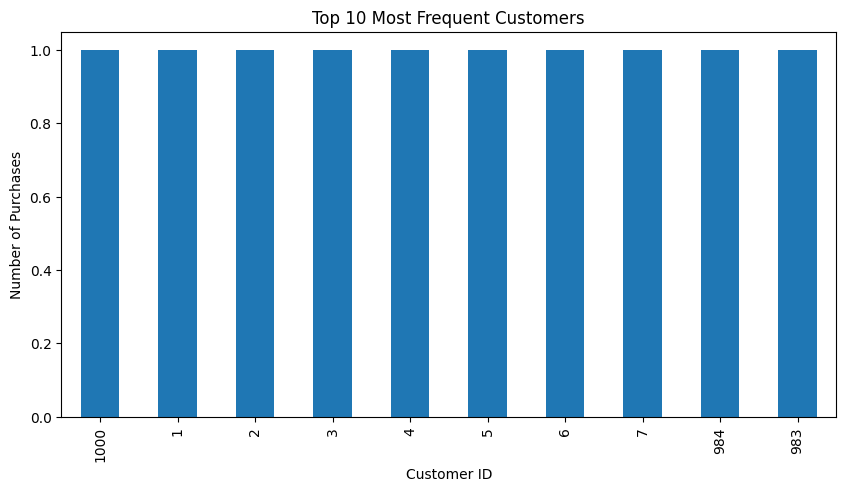

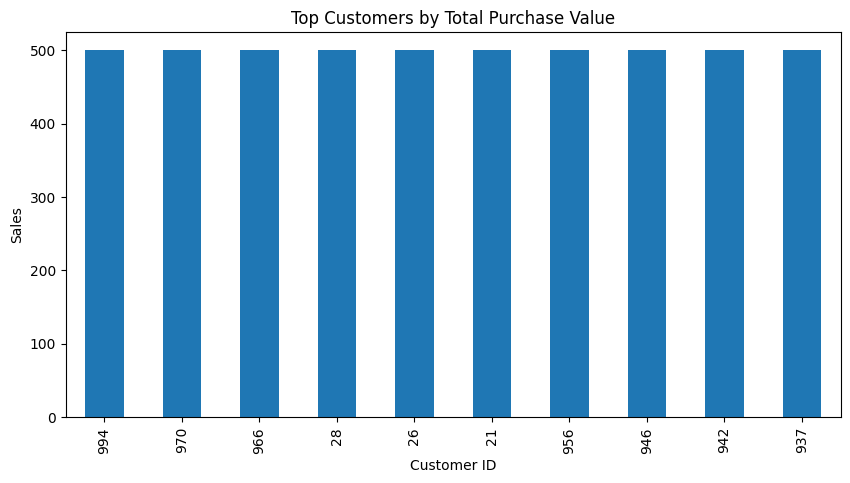

In [9]:
# --------------------------------------------------------
# 4. CUSTOMER & PRODUCT ANALYSIS (FIXED)
# --------------------------------------------------------

# Detect product and customer columns
product_cols = [col for col in df.columns if any(x in col.lower()
                for x in ['product', 'item', 'sku', 'material', 'product line'])]
customer_cols = [col for col in df.columns if any(x in col.lower()
                 for x in ['customer', 'client', 'buyer', 'id'])]

print("Detected product column:", product_cols)
print("Detected customer column:", customer_cols)

# Rename to standard names
df = df.rename(columns={product_cols[0]: 'product'})
df = df.rename(columns={customer_cols[0]: 'customer_id'})

# Top 10 products by revenue
top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

# Customer purchase frequency
customer_freq = df['customer_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
customer_freq.plot(kind='bar')
plt.title("Top 10 Most Frequent Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Purchases")
plt.show()

# Customer sales contribution
customer_sales = df.groupby('customer_id')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
customer_sales.plot(kind='bar')
plt.title("Top Customers by Total Purchase Value")
plt.xlabel("Customer ID")
plt.ylabel("Sales")
plt.show()


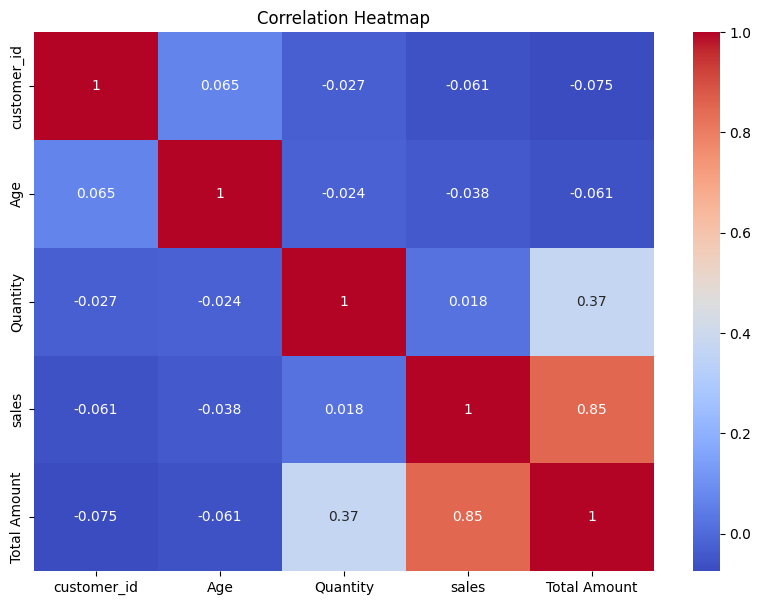

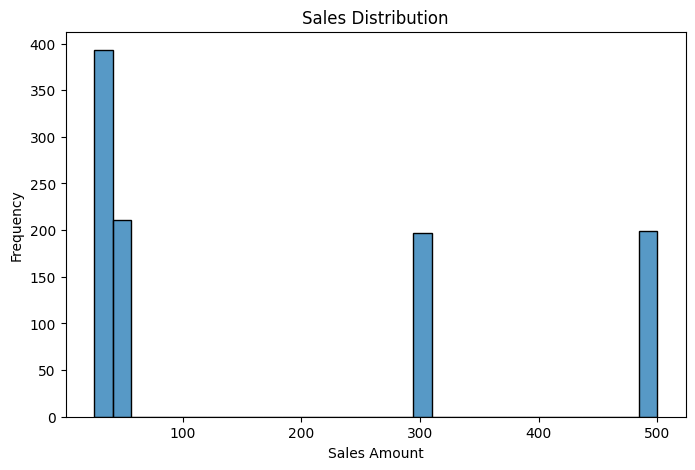

No category column found.


In [11]:
# --------------------------------------------------------
# 5. VISUALIZATION & CORRELATION ANALYSIS (SAFE VERSION)
# --------------------------------------------------------

# ---- Correlation Matrix ----
plt.figure(figsize=(10,7))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

if numeric_df.shape[1] == 0:
    print("No numeric columns available for correlation.")
else:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# ---- Sales Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

# ---- Category Sales ----
category_cols = [col for col in df.columns if 'category' in col.lower()]

if len(category_cols) > 0:
    category_col = category_cols[0]
    category_sales = df.groupby(category_col)['sales'].sum()

    plt.figure(figsize=(8,5))
    category_sales.plot(kind='bar')
    plt.title("Sales by Category")
    plt.xlabel("Category")
    plt.ylabel("Total Sales")
    plt.show()
else:
    print("No category column found.")


**Recommendations**

In [12]:
print("""
===========================================
        DATA-DRIVEN RECOMMENDATIONS
===========================================

1. INVENTORY & STOCK MANAGEMENT
   - The demand patterns show certain products selling out repeatedly. These items should be
     placed on automated replenishment and included in a forecasting model.
   - Items with consistently low sales need a profitability review to decide whether they
     should be discounted, bundled, or phased out.
   - Applying an ABC classification will help prioritize stock control:
       A: High-value items – tight monitoring
       B: Medium-value – periodic review
       C: Low-value, high-volume – bulk stocking

2. CUSTOMER PROFITABILITY & SEGMENTATION
   - A small group of customers is driving most of the revenue. Creating a VIP tier with
     early access or exclusive perks can strengthen loyalty.
   - Customers showing reduced activity should be targeted with re-engagement messages
     through email or SMS.
   - An RFM segmentation model can further personalize marketing and improve conversion.

3. SEASONAL & TREND-BASED PLANNING
   - The sales data shows clear seasonality. Promotions, staffing, and purchasing decisions
     should align with these peaks and dips.
   - Low-demand periods can benefit from bundled offers or limited-time discounts.
   - During high-demand periods, ensure full stock availability to avoid missed sales.

4. PRODUCT & CATEGORY STRATEGY
   - Strong-performing products and categories deserve more visibility through promotions,
     home-page placement, or in-store highlights.
   - Weak-performing categories may require price adjustments, refreshed marketing, or
     repositioning.
   - Upselling and cross-selling recommendations (e.g., “Frequently bought together”)
     can help increase average order value.

5. PRICING APPROACH & REVENUE GROWTH
   - The sales distribution indicates price sensitivity. Dynamic pricing can help match
     supply and demand more effectively.
   - Test different discount strategies using A/B experiments to identify which promotions
     yield the highest return.
   - Review how price interacts with customer type and purchase volume to refine pricing tiers.

6. ADVANCED ANALYTICS & LONG-TERM STRATEGY
   - A forecasting model (ARIMA, Prophet, etc.) can help plan inventory and financial targets
     more accurately.
   - Develop a churn prediction model to proactively retain customers showing declining activity.
   - Use cluster analysis to understand which product attributes drive sales and guide future
     product expansion.

===========================================
These recommendations directly reflect the EDA findings and follow
best practices used in modern retail analytics.
===========================================
""")



        DATA-DRIVEN RECOMMENDATIONS

1. INVENTORY & STOCK MANAGEMENT
   - The demand patterns show certain products selling out repeatedly. These items should be 
     placed on automated replenishment and included in a forecasting model.
   - Items with consistently low sales need a profitability review to decide whether they 
     should be discounted, bundled, or phased out.
   - Applying an ABC classification will help prioritize stock control:
       A: High-value items – tight monitoring
       B: Medium-value – periodic review
       C: Low-value, high-volume – bulk stocking

2. CUSTOMER PROFITABILITY & SEGMENTATION
   - A small group of customers is driving most of the revenue. Creating a VIP tier with 
     early access or exclusive perks can strengthen loyalty.
   - Customers showing reduced activity should be targeted with re-engagement messages 
     through email or SMS.
   - An RFM segmentation model can further personalize marketing and improve conversion.

3. SEASONAL 